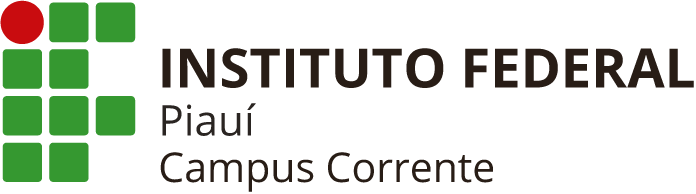

# Atividade Prática: Classificação com o Dataset Wine
**Instituto Federal do Piauí - Campus Corrente**  
**Disciplina:** Tópicos Especiais em Computação
**Professor:** Igor Bezerra Reis  
**Data:** 14 de abril de 2025

Nesta atividade, você irá praticar o pré-processamento de dados, treinamento de modelos de classificação e avaliação de desempenho com métricas apropriadas.

## Objetivos
- Praticar a exploração e preparação de dados.
- Aplicar algoritmos de classificação.
- Avaliar modelos com métricas como acurácia, precisão, recall e F1-score.

## Dataset
Usaremos o dataset `wine` da biblioteca `sklearn.datasets`, que contém dados sobre diferentes cultivares de vinho.

In [ ]:
from sklearn.datasets import load_wine
import pandas as pd

# Carregando o dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Visualizando as primeiras linhas
df.head()

## 1. Exploração dos Dados
- Exiba estatísticas descritivas.
- Verifique se há valores ausentes e trate-os.
- Quantas amostras existem de cada tipo de vinho (target)?
- Entender média, desvio padrão, mínimo, máximo de cada atributo.
- Algumas variáveis podem ser altamente correlacionadas (ex: álcool e cor).
- Como a distribuição de uma variável muda de uma classe para outra.
- Observe o tipo de dados.

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

# Carregando o dataset
data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Estatísticas descritivas
print(df.describe())

# Verificando valores ausentes
print(df.isnull().sum())

# Contagem de amostras por classe
print(df['target'].value_counts())

# Tipos de dados
print(df.dtypes)


          alcohol  malic_acid         ash  alcalinity_of_ash   magnesium  \
count  178.000000  178.000000  178.000000         178.000000  178.000000   
mean    13.000618    2.336348    2.366517          19.494944   99.741573   
std      0.811827    1.117146    0.274344           3.339564   14.282484   
min     11.030000    0.740000    1.360000          10.600000   70.000000   
25%     12.362500    1.602500    2.210000          17.200000   88.000000   
50%     13.050000    1.865000    2.360000          19.500000   98.000000   
75%     13.677500    3.082500    2.557500          21.500000  107.000000   
max     14.830000    5.800000    3.230000          30.000000  162.000000   

       total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.9

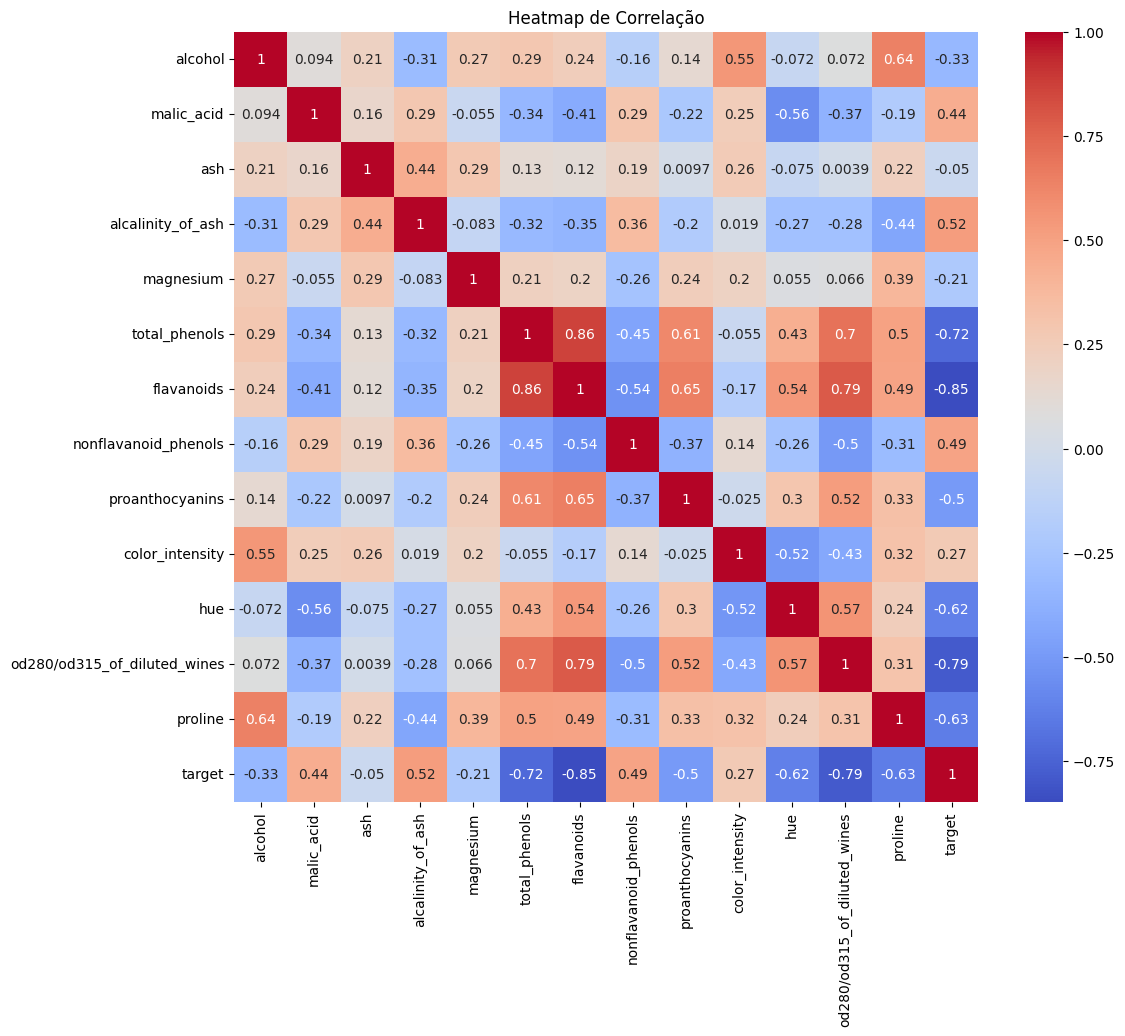

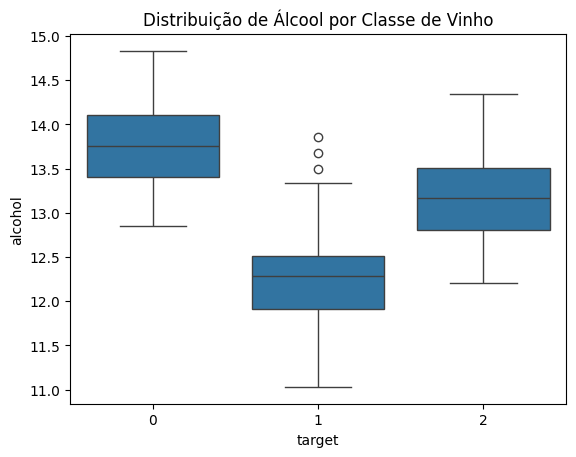

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizando correlação
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap de Correlação")
plt.show()

# Distribuição de uma variável por classe
sns.boxplot(x='target', y='alcohol', data=df)
plt.title('Distribuição de Álcool por Classe de Vinho')
plt.show()


## 2. Pré-processamento
- Normalize os dados numéricos com `StandardScaler`.
- Separe `X` (features) e `y` (target).

In [3]:
from sklearn.preprocessing import StandardScaler

# Separando X e y
X = df.drop('target', axis=1)
y = df['target']

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## 3. Divisão em treino e teste
Divida o conjunto de dados em 80% treino e 20% teste usando `train_test_split`.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


## 4. Treinamento de Modelos
Treine pelo menos **dois modelos de classificação diferentes**, como:
- Regressão Logística (`LogisticRegression`)
- Árvores de Decisão (`DecisionTreeClassifier`)

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Modelo 1: Regressão Logística
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Modelo 2: Árvore de Decisão
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

## 5. Avaliação dos Modelos
Gere a matriz de confusão para cada modelo e avalie os modelos utilizando as métricas:
- Acurácia
- Precisão
- Recall
- F1-score

In [6]:
from sklearn.metrics import classification_report, confusion_matrix

def avaliar_modelo(nome, modelo):
    print(f"--- {nome} ---")
    y_pred = modelo.predict(X_test)
    print("Matriz de Confusão:")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório de Classificação:")
    print(classification_report(y_test, y_pred))

avaliar_modelo("Regressão Logística", log_model)
avaliar_modelo("Árvore de Decisão", tree_model)


--- Regressão Logística ---
Matriz de Confusão:
[[12  0  0]
 [ 0 14  0]
 [ 0  1  9]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.93      1.00      0.97        14
           2       1.00      0.90      0.95        10

    accuracy                           0.97        36
   macro avg       0.98      0.97      0.97        36
weighted avg       0.97      0.97      0.97        36

--- Árvore de Decisão ---
Matriz de Confusão:
[[11  1  0]
 [ 0 14  0]
 [ 0  1  9]]

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.92      0.96        12
           1       0.88      1.00      0.93        14
           2       1.00      0.90      0.95        10

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



## 6. Crie uma tabela comparativa entre os dois modelos
Preencha uma tabela como a seguir com os resultados dos seus modelos:

| Modelo               | Acurácia | Precisão | Recall | F1-score |
|---------------------|----------|----------|--------|----------|
| Regressão Logística |          |          |        |          |
| Árvore de Decisão                 |          |          |        |          |

In [7]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def calcular_metricas(nome, modelo):
    y_pred = modelo.predict(X_test)
    return {
        'Modelo': nome,
        'Acurácia': accuracy_score(y_test, y_pred),
        'Precisão': precision_score(y_test, y_pred, average='macro'),
        'Recall': recall_score(y_test, y_pred, average='macro'),
        'F1-score': f1_score(y_test, y_pred, average='macro')
    }

resultados = pd.DataFrame([
    calcular_metricas("Regressão Logística", log_model),
    calcular_metricas("Árvore de Decisão", tree_model)
])

print(resultados)


                Modelo  Acurácia  Precisão    Recall  F1-score
0  Regressão Logística  0.972222  0.977778  0.966667  0.970962
1    Árvore de Decisão  0.944444  0.958333  0.938889  0.945741


## 7. Desafio (Opcional)
- Use `GridSearchCV` para encontrar os melhores hiperparâmetros de um dos modelos.
- Visualize o `heatmap` de correlação entre as features.

In [8]:
from sklearn.model_selection import GridSearchCV

# Definindo os parâmetros para Decision Tree
param_grid = {
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 4, 6]
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Melhores parâmetros encontrados:", grid_search.best_params_)
print("Melhor score:", grid_search.best_score_)


Melhores parâmetros encontrados: {'max_depth': 4, 'min_samples_split': 6}
Melhor score: 0.9231527093596059
